In [7]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris = datasets.load_iris()
data = iris.data
df = pd.DataFrame(data, columns=iris.feature_names)

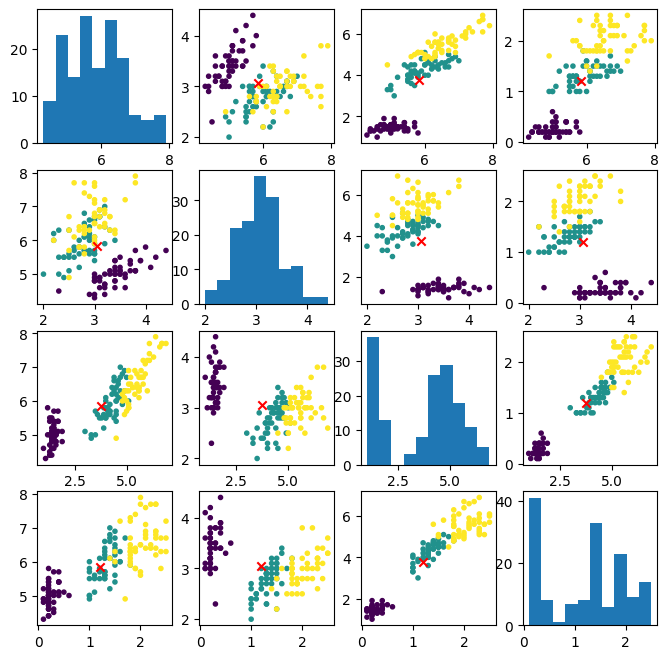

In [39]:
means = np.mean(data, axis=0)
dimensions = df.shape[1]
plt.figure(figsize=(8,8))
for i in range(dimensions):
    for j in range(dimensions):
        if i==j:
            plt.subplot(dimensions,dimensions,i*dimensions+j+1)
            plt.hist(data[:,i])
        else:
            plt.subplot(dimensions,dimensions,i*dimensions+j+1)
            plt.scatter(data[:,i], data[:,j], c=iris.target, marker= ".")
            plt.scatter(means[i], means[j], c="red", marker="x")

In [22]:
np.mean(data, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

La definicion de covarianza a partir de operaciones matriciales es 
$$ \frac{(X-\mu).T\cdot(X-\mu)}{N-1}$$
Donde N es la cantidad de datos

In [38]:
Z = data - np.mean(data, axis=0)
matrix = np.dot(Z.T, Z)
cov = matrix/(data.shape[0]-1)

cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [34]:
np.cov(data.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Distancia de Mahalannobis de cada punto a su media

In [89]:
def mahalanobis(x:np.ndarray, y:np.ndarray, cov_inv:np.ndarray) -> float:
    delta = x-y
    return np.sqrt(np.dot(np.dot(delta.T, cov_inv), delta))

cov = np.cov(data.T)
cov_inv = np.linalg.inv(cov)
distance_to_mean = np.zeros((data.shape[0]))
for i in range(data.shape[0]):
        distance_to_mean[i] = mahalanobis(data[i], means, cov_inv)

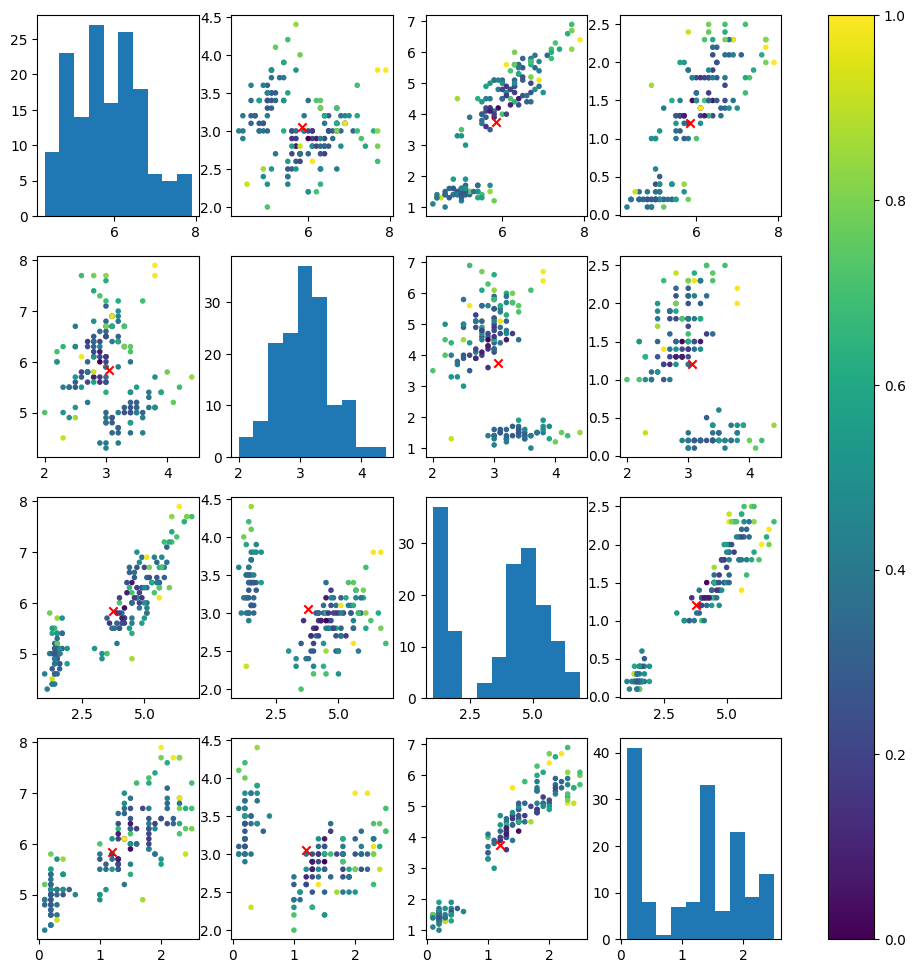

In [90]:
color = np.round((distance_to_mean - min(distance_to_mean))/(max(distance_to_mean) - min(distance_to_mean))*100).astype(int)

means = np.mean(data, axis=0)
dimensions = df.shape[1]

fig, ax = plt.subplots(dimensions,dimensions)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(dimensions):
    for j in range(dimensions):
        if i==j:
            ax[i,j].hist(data[:,i])
        else:
            ax[i,j].scatter(data[:,i], data[:,j], c=color, cmap="viridis", marker= ".")
            ax[i,j].scatter(means[i], means[j], c="red", marker="x")

fig.colorbar(plt.cm.ScalarMappable(cmap="viridis"), ax=ax)